## Telecom Customer Churn Prediction using Deep Learning 

**Author:** Aman Deep

**Objective:** Predict Customer Churn to enable proactive retention 
strategies

**Dataset:** Telecom Customer Churn Dataset

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["figure.figsize"]=(7,4)
plt.rcParams["axes.titlesize"]=14
plt.rcParams["axes.labelsize"]=12

sns.set_style("whitegrid")

In [13]:
data_path = r"D:\Aman Deep\Deep-Learning\telecom-churn-deep-learning\data\raw\telco-Customer-Churn.csv"
df = pd.read_csv(data_path)


In [16]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape

(7043, 21)

No of columns: 21

No of rows: 7043

## Business Problem

Telecom operators lose significant revenue due to customer churn.  
This project aims to identify customers likely to churn in the next billing cycle using historical customer behavior and service usage data, allowing targeted retention actions.


In [18]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

The dataset exhibits class imbalance, reflecting real-world telecom churn patterns where churned customers form a minority

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
#Here total charges is an object. We need to convert it to numeric format
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing values in TotalCharges primarily occur for new customers with very low tenure.

## Feature Categories

- **Customer Profile:** gender, SeniorCitizen, tenure  
- **Service Information:** PhoneService, InternetService, OnlineSecurity  
- **Contract & Billing:** Contract, PaymentMethod, MonthlyCharges, TotalCharges  
- **Target Variable:** Churn


### Churn vs Cotact 

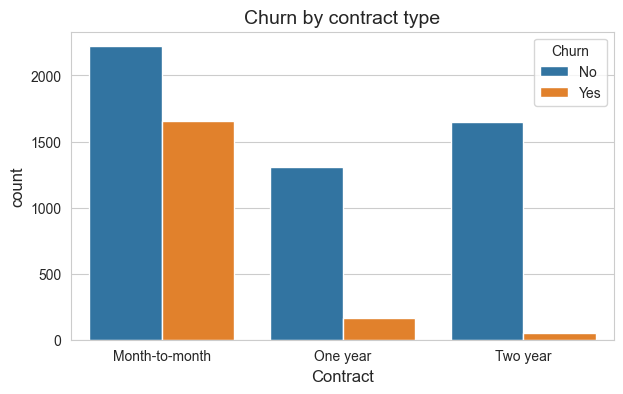

In [28]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by contract type")
plt.show()

### Churn vs Tenure

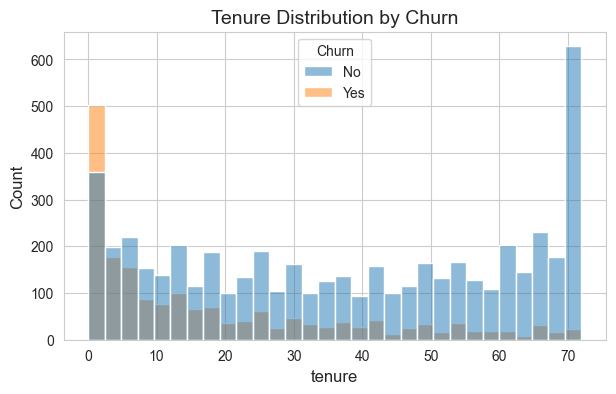

In [32]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()

### Monthly Charges vs Churn

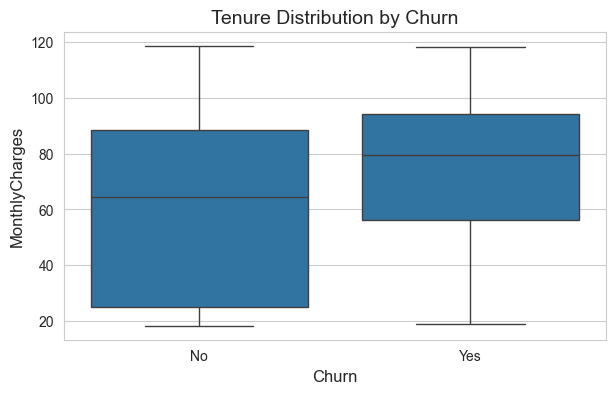

In [33]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Tenure Distribution by Churn")
plt.show()

## Key Insights

- Month-to-month contracts show significantly higher churn
- Customers with low tenure are more likely to churn
- Higher monthly charges correlate with increased churn risk


In [35]:
df.to_csv(r"D:\Aman Deep\Deep-Learning\telecom-churn-deep-learning\data\processed\telecom_churn_initial_clean.csv", index=False)